## 1.

*Recogiendo los datos de coronavirus de la página https://ourworldindata.org/coronavirus-source-data* 

A partir de la letra de tu DNI, elige al país que empieza por dicha letra que más fallecidos tenga. Si el país elegido no está entre el top 20 de fallecidos, elige como país España.

En este caso, utilizaremos las columnas:

- Nuevos casos
- Nuevos fallecidos
- Población
- Fallecidos totales
- Casos totales

La fecha debe estar en el índice.

1. Representa todas las columnas en un gráfica con diferentes magnitudes en el eje y para su correcta visualización.

2. Elimina la columna "Población".

3. Entrena los algoritmos de regresión que hemos visto hasta ahora para predecir dos columnas por separado: Nuevos casos y Nuevos fallecidos. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento. ¿Qué error se comete? ¿crees que los algoritmos de ML vistos hasta ahora son buenos para realizar un forecast de una serie temporal viendo los resultados?

4. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones = 23 y n_repeats = 7 para este ejercicio y solo para la columna "nuevos casos".

In [2]:
import pandas as pd
df = pd.read_csv("../data/owid-covid-data.csv")

In [3]:
df1 = df[["location", "new_cases", "new_deaths", "population", "total_deaths", "total_cases"]]

In [4]:
groupby_data_max = df1.groupby(["location"]).max()

In [5]:
groupby_data_max.sort_values(by="total_deaths", ascending=False).iloc[6:27]

,new_cases,new_deaths,population,total_deaths,total_cases
location,,,,,
United States,300462.0,4475.0,3.310026e+08,602092.0,33554275.0
Brazil,100158.0,4249.0,2.125594e+08,502586.0,17966831.0
India,414188.0,7374.0,1.380004e+09,389302.0,29977861.0
Mexico,28115.0,4272.0,1.289328e+08,231244.0,2478551.0
Peru,21358.0,1234.0,3.297185e+07,190645.0,2030611.0
Africa,36473.0,1220.0,1.340598e+09,137954.0,5225099.0
United Kingdom,68192.0,1826.0,6.788600e+07,128245.0,4656536.0
Russia,29499.0,624.0,1.459345e+08,127641.0,5272328.0
Italy,40902.0,993.0,6.046183e+07,127291.0,4253460.0


## WE ARE GOING TO WORK WITH TURKEY

In [6]:
df_turkey = df[["date", "location", "new_cases", "new_deaths", "population", "total_deaths", "total_cases"]]

In [7]:
df_turkey = df_turkey[df_turkey["location"] == "Turkey"]

In [8]:
df_turkey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 89646 to 90113
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          468 non-null    object 
 1   location      468 non-null    object 
 2   new_cases     467 non-null    float64
 3   new_deaths    462 non-null    float64
 4   population    468 non-null    float64
 5   total_deaths  462 non-null    float64
 6   total_cases   468 non-null    float64
dtypes: float64(5), object(2)
memory usage: 29.2+ KB


In [9]:
df_turkey = df_turkey.set_index("date")

In [10]:
df_turkey

,location,new_cases,new_deaths,population,total_deaths,total_cases
date,,,,,,
2020-03-11,Turkey,1.0,NaN,84339067.0,NaN,1.0
2020-03-12,Turkey,0.0,NaN,84339067.0,NaN,1.0
2020-03-13,Turkey,4.0,NaN,84339067.0,NaN,5.0
2020-03-14,Turkey,0.0,NaN,84339067.0,NaN,5.0
2020-03-15,Turkey,1.0,NaN,84339067.0,NaN,6.0
...,...,...,...,...,...,...
2021-06-17,Turkey,5904.0,62.0,84339067.0,49012.0,5354153.0
2021-06-18,Turkey,5575.0,59.0,84339067.0,49071.0,5359728.0
2021-06-19,Turkey,5480.0,51.0,84339067.0,49122.0,5365208.0


In [11]:
df_turkey.dropna(inplace=True)

In [12]:
df_turkey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 461 entries, 2020-03-17 to 2021-06-21
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      461 non-null    object 
 1   new_cases     461 non-null    float64
 2   new_deaths    461 non-null    float64
 3   population    461 non-null    float64
 4   total_deaths  461 non-null    float64
 5   total_cases   461 non-null    float64
dtypes: float64(5), object(1)
memory usage: 25.2+ KB


## 1. GRAPHICS

In [13]:
import matplotlib.pyplot as plt

In [14]:
df_turkey.index

Index(['2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
       ...
       '2021-06-12', '2021-06-13', '2021-06-14', '2021-06-15', '2021-06-16',
       '2021-06-17', '2021-06-18', '2021-06-19', '2021-06-20', '2021-06-21'],
      dtype='object', name='date', length=461)

<AxesSubplot:xlabel='date'>

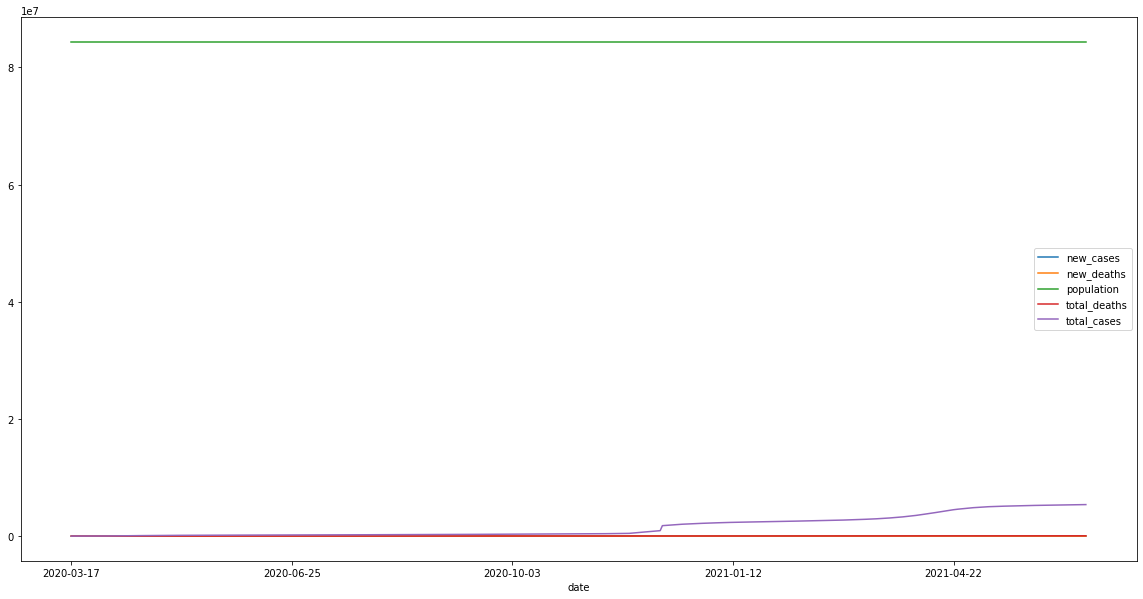

In [15]:
df_turkey.plot(figsize=(20,10))

<AxesSubplot:xlabel='date'>

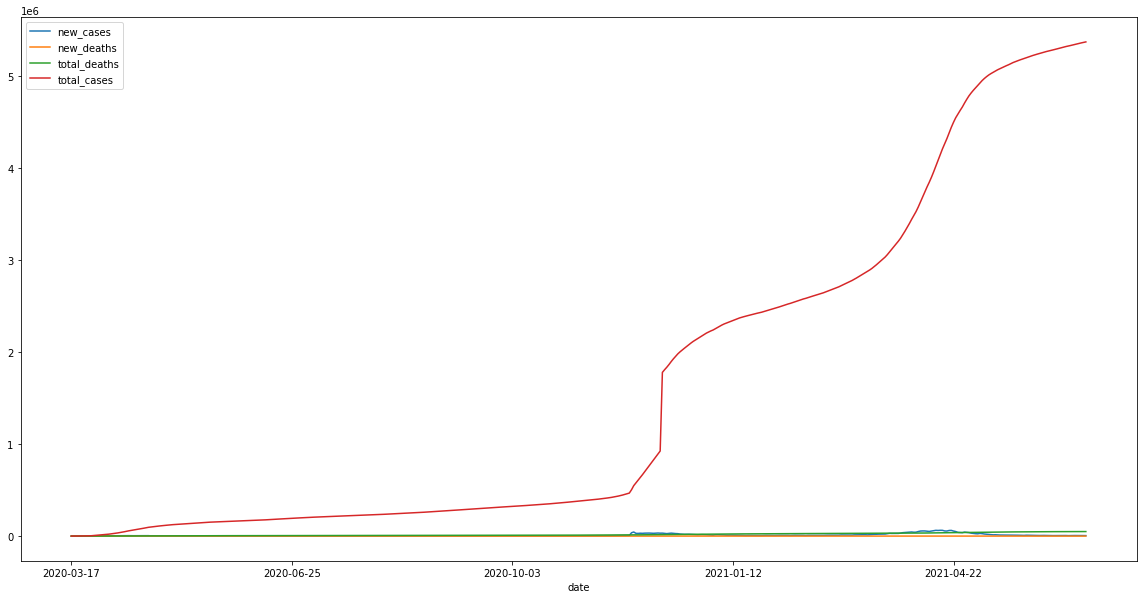

In [16]:
df_turkey.drop("population", axis=1).plot(figsize=(20,10))

<AxesSubplot:xlabel='date'>

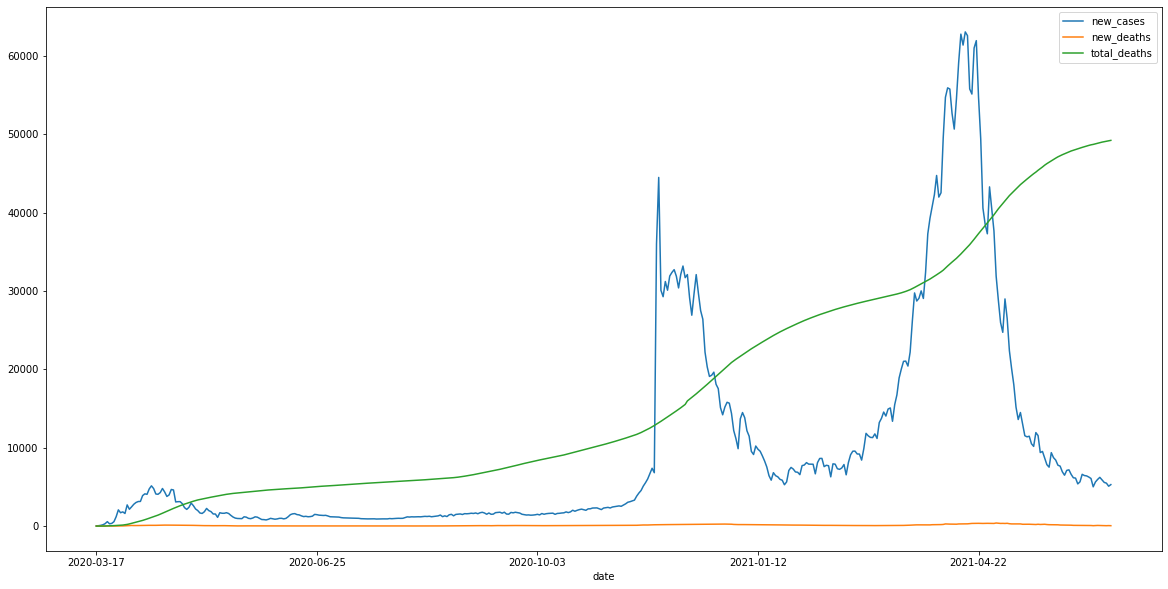

In [17]:
df_turkey.drop(["population", "total_cases"], axis=1).plot(figsize=(20,10))

<AxesSubplot:xlabel='date'>

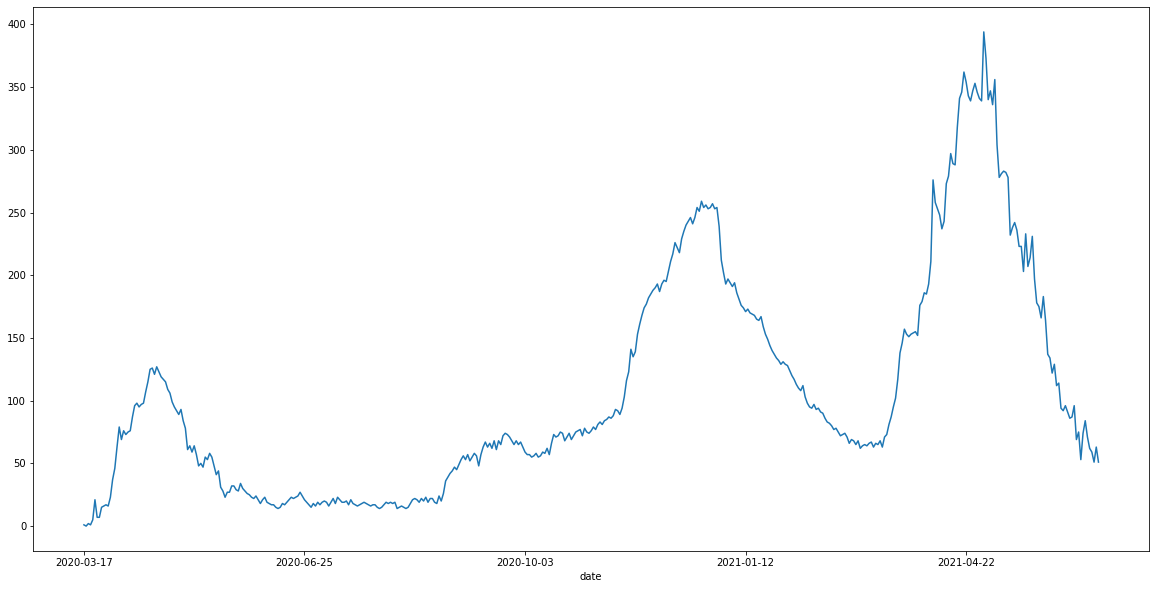

In [18]:
df_turkey["new_deaths"].plot(figsize=(20,10))

In [19]:
type(df_turkey)

pandas.core.frame.DataFrame

In [20]:
# No se porque no me deja hacer el gráfico de abajo. 

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def plot_columns(df):
    colors = ['firebrick', 'royalblue', 'forestgreen', 'gold', 'orange']
    x_plot = np.array(df.index)
    fig, ax_left = plt.subplots(figsize=(15,10))
    ax_right = ax_left.twinx()
    for i, col in enumerate(list(df.columns)):
        if col == 'population':
            ax_right.plot(x_plot, np.array(df[col]), color=colors[i], label=col)
        else:
            ax_left.plot(x_plot, np.array(df[col]), color=colors[i], label=col)
    ax_left.legend(loc='best')
    ticks = ax_left.get_xticks()[::40]
    ax_left.set_xticks(ticks)
    ax_left.set_xlabel('Time')

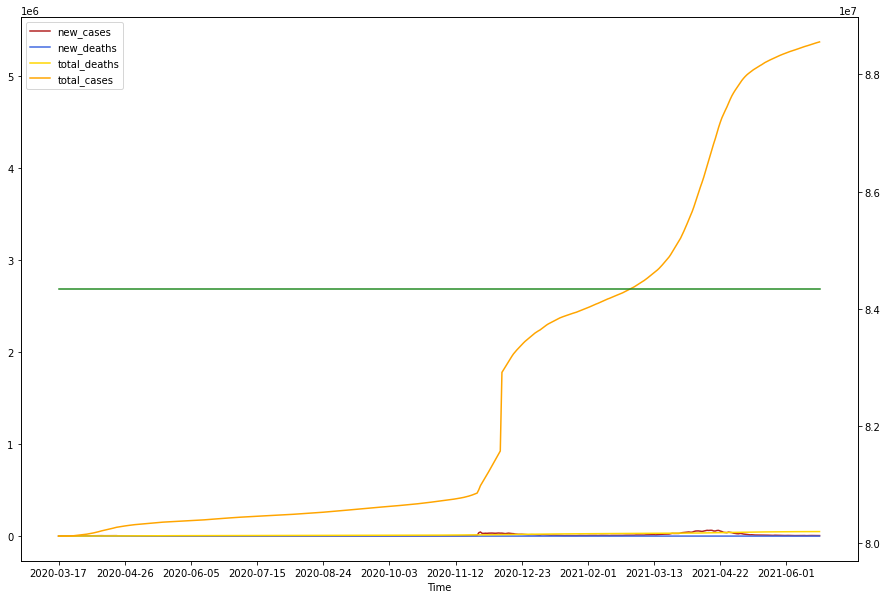

In [23]:
plot_columns(df_turkey.drop("location",axis=1))

## Cross Validation

#### 1. PREDICT NEW CASES

In [25]:
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import std
import numpy as np 

In [26]:
X = np.array(df_turkey.drop(["location","new_cases"], axis=1))
y = np.array(df_turkey["new_cases"])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [28]:
k_fold = RepeatedKFold(n_splits=23, n_repeats=7, random_state=2)

In [29]:
import itertools
lst = range(1,8)
epoca = list(itertools.chain.from_iterable(itertools.repeat(x, 23) for x in lst))
len(epoca)

161

In [30]:
numbers = list(range(1, 24))
iterations = []
for x in range(7):
    iterations.extend(numbers)

print(len(iterations))

161


### Polynomial

In [31]:
polinominal_model = PolynomialFeatures(3) 
X_poly = polinominal_model.fit_transform(X_train, y_train)
linreg = LinearRegression()

In [32]:
val_score = []
train_score = []
mae_traine = []
rmse_traine = []

for i, (train, val) in enumerate(k_fold.split(X_poly)):

    linreg.fit(X_poly[train], y_train[train])
    score_val = round(linreg.score(X_poly[val], y_train[val]), 3)
    val_score.append(score_val)
    score_train = linreg.score(X_poly[train], y_train[train])
    train_score.append(score_train)
    mae_train = mean_absolute_error(y_train[train], linreg.predict(X_poly[train]))
    mae_traine.append(mae_train)
    rmse_train = np.sqrt(mean_squared_error(y_train[train], linreg.predict(X_poly[train])))
    rmse_traine.append(rmse_train)

print("val_score: ", val_score)
print("-----------------------------------------------------")
print("train_score: ", train_score)
print("-----------------------------------------------------")
print("mae_traine: ", mae_traine)
print("-----------------------------------------------------")
print("rmse_traine: ", rmse_traine)

mae_val = cross_val_score(linreg, X_poly, y_train, cv=k_fold, scoring="neg_mean_absolute_error", n_jobs=-1)
mae_val = abs(mae_val)
rmse_val = cross_val_score(linreg, X_poly, y_train, cv=k_fold, scoring='neg_root_mean_squared_error', n_jobs=-1)
rmse_val = abs(rmse_val)
print("-----------------------------------------------------")
print("mae_val: ", mae_val)
print("-----------------------------------------------------")
print("rmse_val: ", rmse_val)


val_score:  [0.946, 0.888, 0.982, 0.981, 0.994, 0.966, 0.993, 0.918, 0.932, 0.89, 0.987, 0.96, 0.972, 0.966, 0.839, 0.986, 0.867, 0.978, 0.943, 0.992, 0.859, 0.991, 0.987, 0.97, 0.975, 0.683, 0.997, 0.939, 0.958, 0.892, 0.976, 0.965, 0.993, 0.981, 0.992, 0.985, 0.984, 0.982, 0.998, 0.981, 0.942, 0.944, 0.986, 0.967, 0.945, 0.923, 0.991, 0.976, 0.979, 0.973, 0.956, 0.961, 0.951, 0.987, 0.988, 0.707, 0.959, 0.943, 0.985, 0.92, 0.997, 0.826, 0.735, 0.89, 0.967, 0.956, 0.981, 0.971, 0.978, 0.979, 0.987, 0.975, 0.974, 0.887, 0.97, 0.978, 0.982, 0.982, 0.913, 0.915, 0.991, 0.073, 0.996, 0.958, 0.943, 0.993, 0.998, 0.992, 0.772, 0.983, 0.88, 0.992, 0.991, 0.976, 0.987, 0.965, 0.974, 0.914, 0.919, 0.992, 0.944, 0.989, 0.967, 0.98, 0.578, 0.968, 0.991, 0.959, 0.935, 0.988, 0.962, 0.9, 0.992, 0.872, 0.979, 0.99, 0.991, 0.989, 0.977, 0.963, 0.671, 0.967, 0.91, 0.948, 0.998, 0.936, 0.986, 0.801, 0.843, 0.935, 0.989, 0.973, 0.946, 0.954, 0.984, 0.984, 0.807, 0.968, 0.973, 0.925, 0.95, 0.973, 0.982,

In [33]:
errors = pd.DataFrame({"epoca": epoca, "iterations":iterations,  "rmse_val": rmse_val, "rmse_train": rmse_traine})
errors

,epoca,iterations,rmse_val,rmse_train
0,1,1,2361.483533,2469.506044
1,1,2,4429.438003,2348.191486
2,1,3,1947.954201,2480.267216
3,1,4,1870.036401,2485.393248
4,1,5,1151.832490,2503.881982
...,...,...,...,...
156,7,19,1766.801116,2489.222099
157,7,20,1143.272162,2502.333406
158,7,21,4117.232113,2393.884743
159,7,22,3262.670694,2429.206934


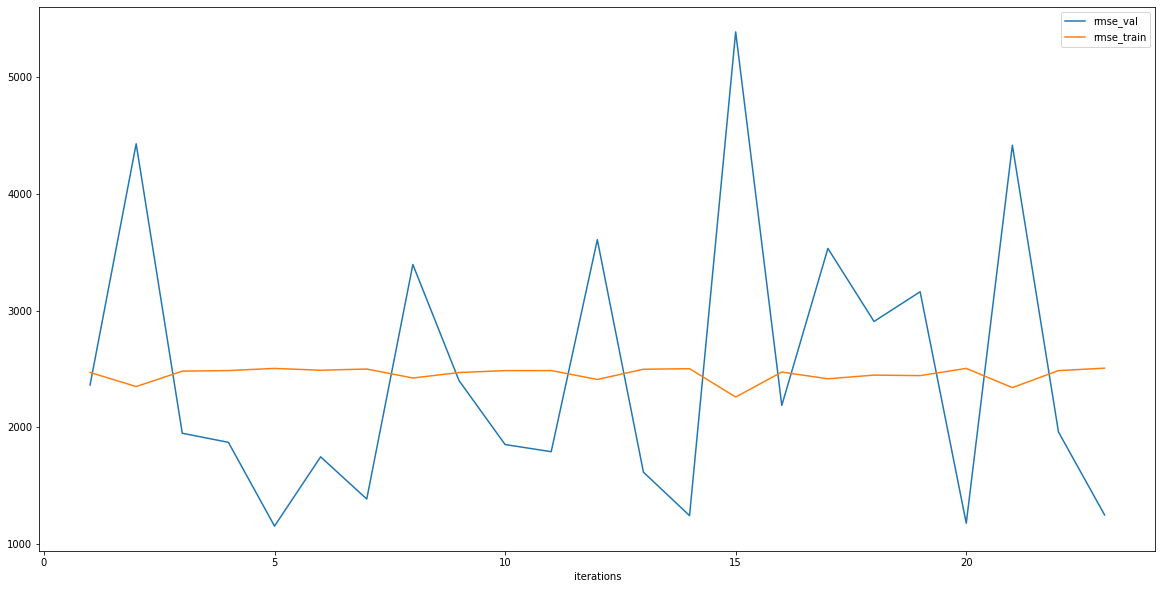

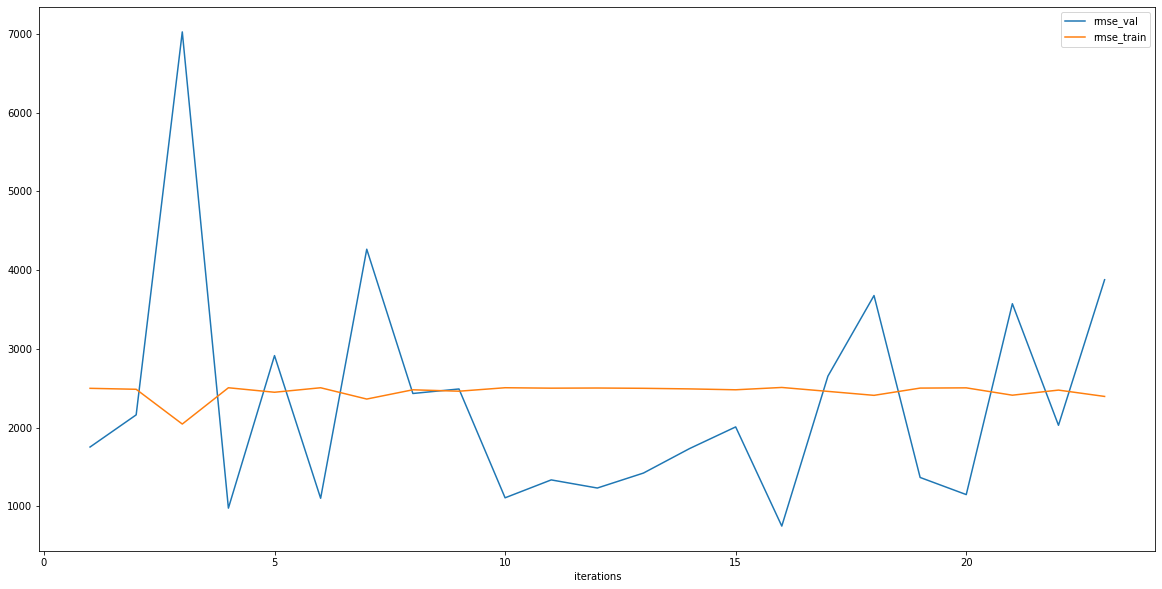

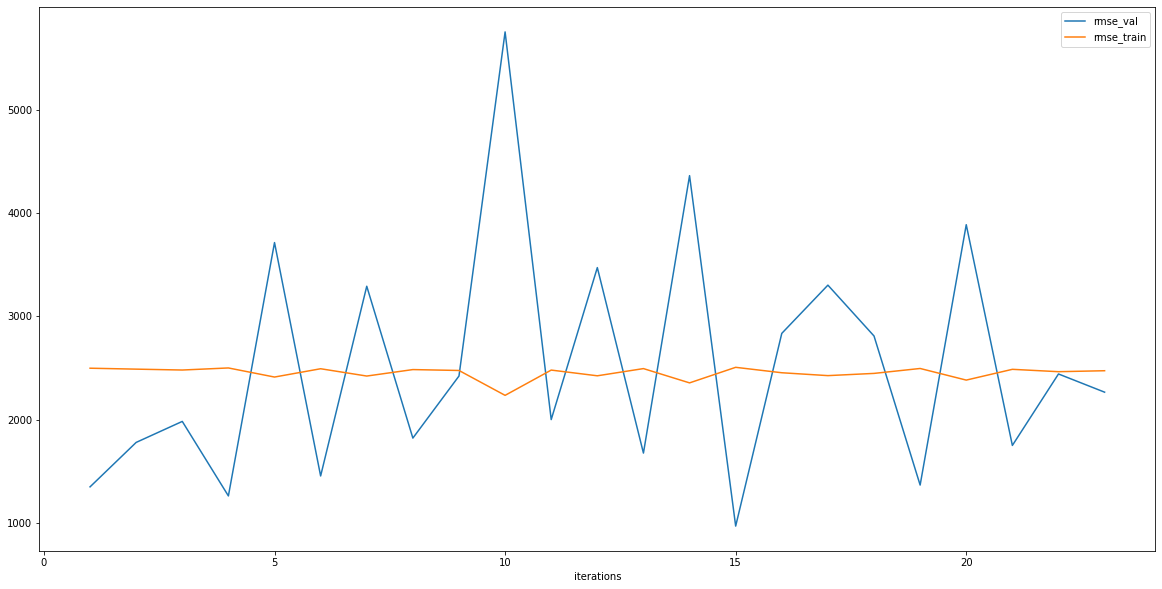

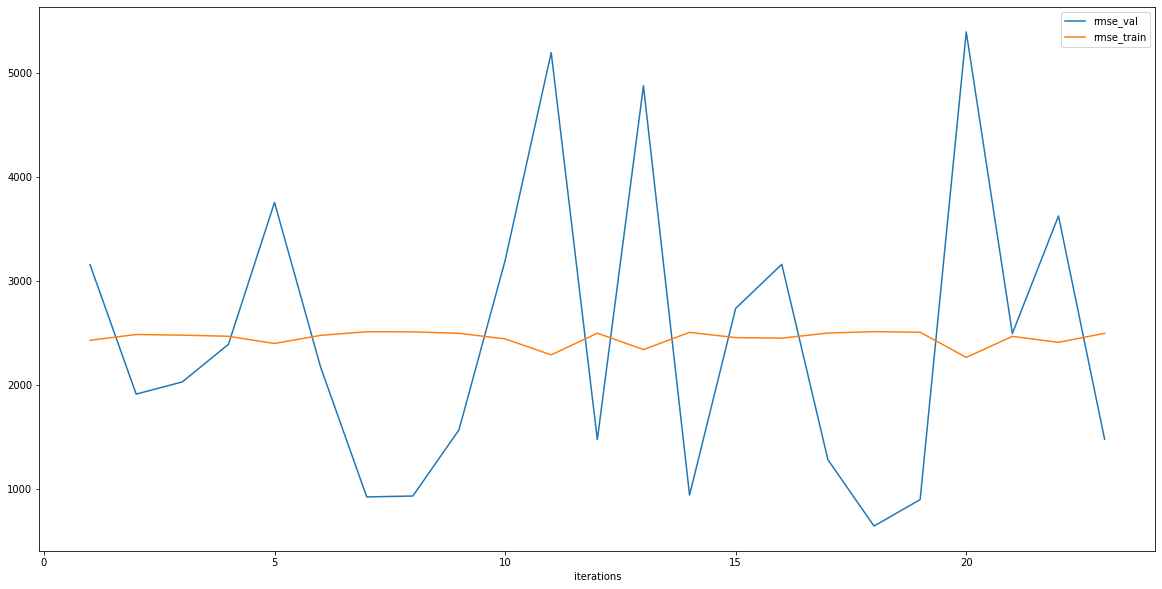

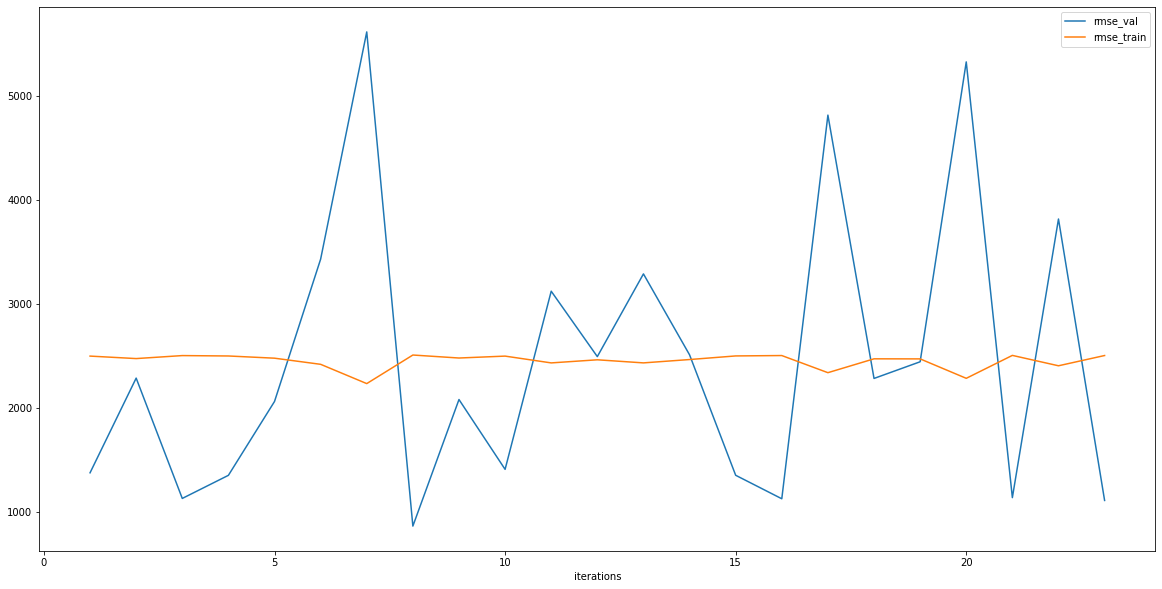

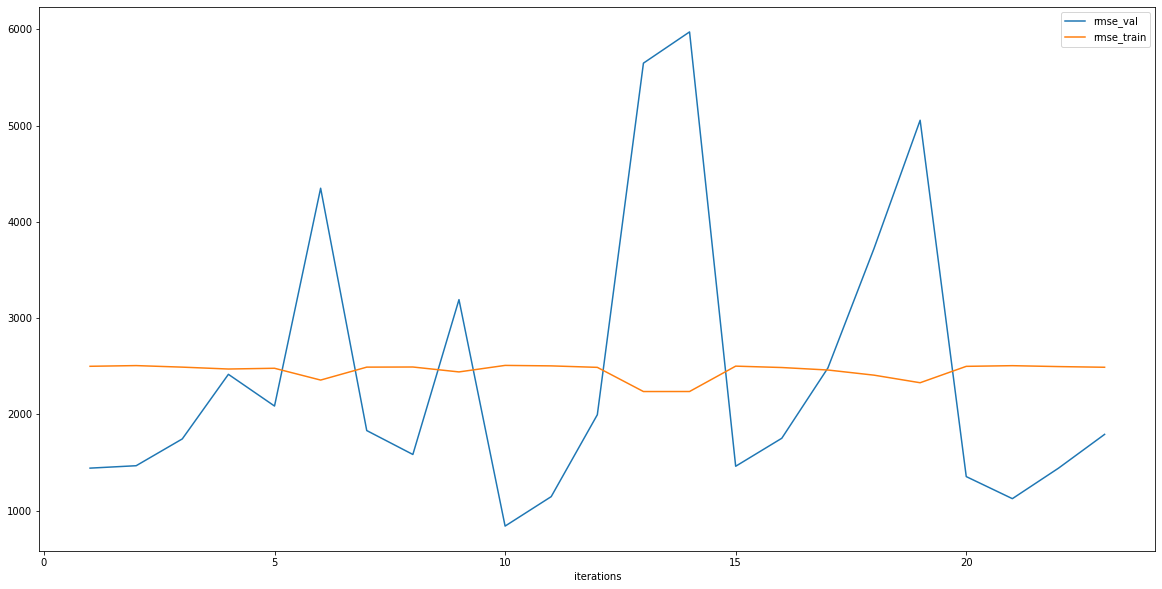

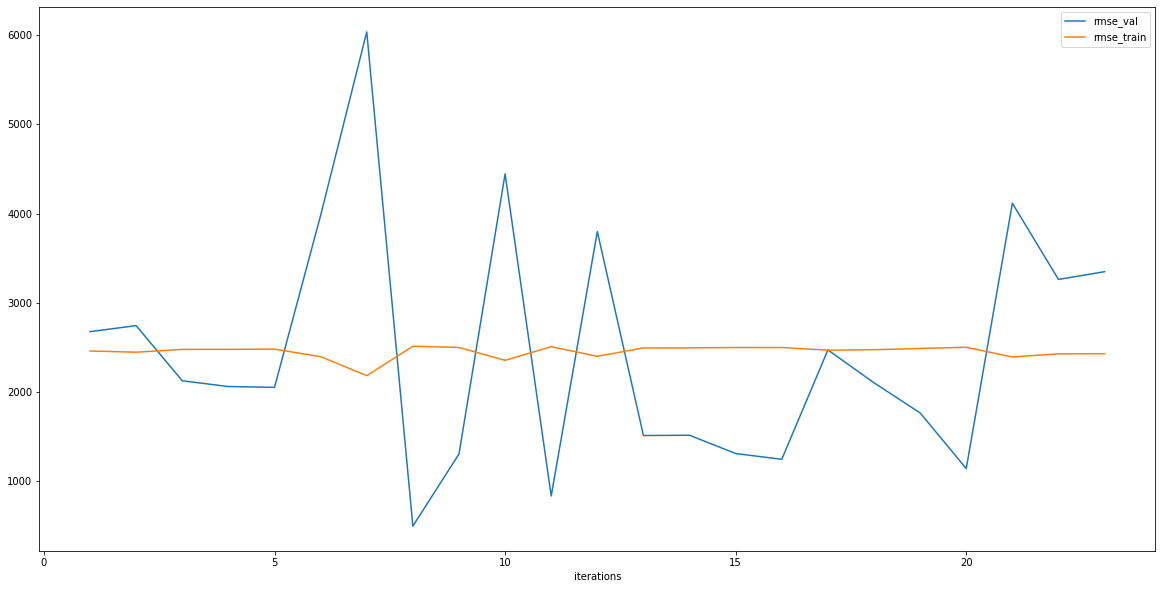

In [34]:
def plot(n):
    e1 = errors[errors["epoca"] == n]
    e1 = e1.set_index("iterations", drop=True)
    e1.drop("epoca", axis=1, inplace=True)
    
    e1.plot(figsize=(20,10))

for i in range(1, 8):
    plot(i)

In [35]:
errors = errors.set_index(["epoca", "iterations"])

<AxesSubplot:xlabel='epoca,iterations'>

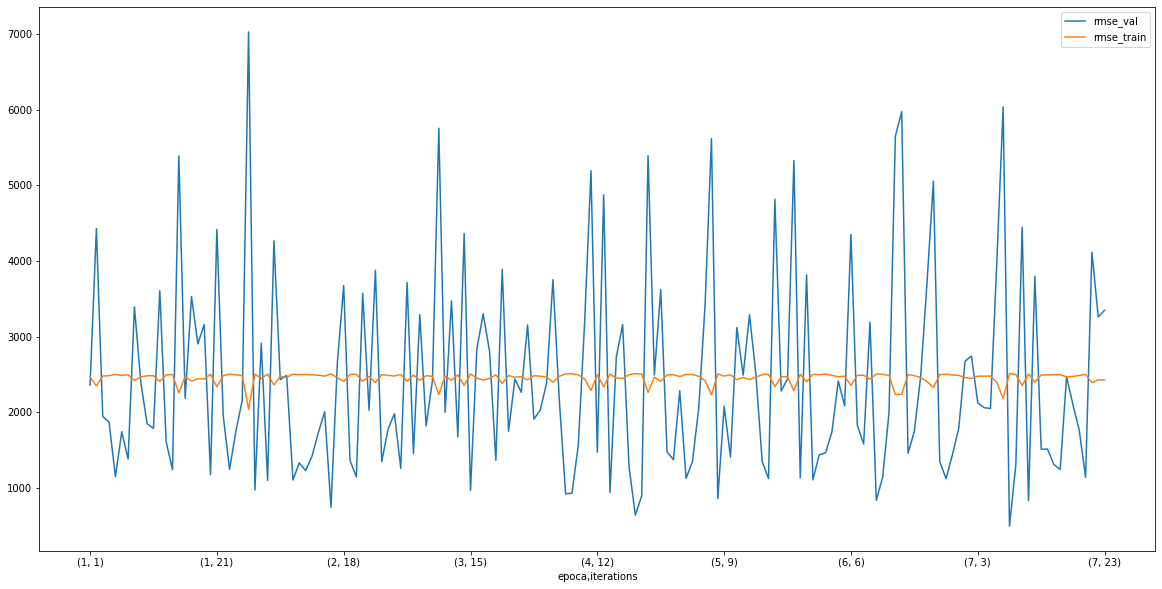

In [36]:
errors.plot(figsize=(20,10))

### LINEAR REGRESSION

In [37]:
lm = LinearRegression()

In [38]:
val_score = []
train_score = []
mae_traine = []
rmse_traine = []

for i, (train, val) in enumerate(k_fold.split(X_train)):

    lm.fit(X_train[train], y_train[train])
    score_val = round(lm.score(X_train[val], y_train[val]), 3)
    val_score.append(score_val)
    score_train = lm.score(X_train[train], y_train[train])
    train_score.append(score_train)
    mae_train = mean_absolute_error(y_train[train], lm.predict(X_train[train]))
    mae_traine.append(mae_train)
    rmse_train = np.sqrt(mean_squared_error(y_train[train], lm.predict(X_train[train])))
    rmse_traine.append(rmse_train)

print("val_score: ", val_score)
print("-----------------------------------------------------")
print("train_score: ", train_score)
print("-----------------------------------------------------")
print("mae_traine: ", mae_traine)
print("-----------------------------------------------------")
print("rmse_traine: ", rmse_traine)

mae_val = cross_val_score(lm, X_train, y_train, cv=k_fold, scoring="neg_mean_absolute_error", n_jobs=-1)
mae_val = abs(mae_val)
rmse_val = cross_val_score(lm, X_train, y_train, cv=k_fold, scoring='neg_root_mean_squared_error', n_jobs=-1)
rmse_val = abs(rmse_val)

print("-----------------------------------------------------")
print("mae_val: ", mae_val)
print("-----------------------------------------------------")
print("rmse_val: ", rmse_val)

val_score:  [0.767, 0.584, 0.727, 0.703, 0.595, 0.528, 0.581, 0.54, 0.46, -1.116, 0.722, 0.657, 0.603, -0.071, 0.484, 0.407, 0.797, 0.678, 0.598, 0.536, 0.373, 0.554, 0.85, 0.591, 0.705, 0.29, 0.715, 0.678, 0.195, 0.756, 0.602, 0.707, 0.578, 0.214, 0.646, 0.487, 0.49, 0.758, 0.652, 0.534, 0.635, -0.502, 0.222, 0.429, 0.379, 0.748, 0.635, 0.685, 0.611, 0.523, 0.536, 0.188, 0.778, 0.578, 0.52, 0.357, 0.662, 0.499, 0.533, 0.563, 0.707, 0.113, 0.009, 0.257, 0.378, 0.713, 0.59, 0.646, 0.712, 0.727, 0.668, 0.628, 0.649, 0.607, 0.618, 0.033, 0.42, 0.466, 0.271, 0.582, 0.648, -0.94, 0.605, 0.164, 0.577, 0.547, 0.802, 0.825, 0.487, 0.685, 0.672, 0.586, 0.535, 0.571, 0.384, 0.226, 0.519, 0.835, 0.627, 0.585, 0.138, 0.589, 0.697, 0.631, -1.004, 0.491, 0.776, -0.485, 0.74, 0.663, 0.629, 0.511, 0.499, 0.621, 0.395, 0.644, 0.522, 0.529, 0.657, 0.786, 0.342, 0.669, -0.189, 0.484, 0.685, -1.89, 0.714, 0.233, 0.647, -0.29, 0.607, 0.581, 0.68, 0.619, 0.503, 0.71, -2.257, 0.498, 0.566, 0.308, 0.436, 0.6,

In [39]:
errors = pd.DataFrame({"epoca": epoca, "iterations":iterations,  "rmse_val": rmse_val, "rmse_train": rmse_traine})
errors

,epoca,iterations,rmse_val,rmse_train
0,1,1,4911.895176,8781.647198
1,1,2,8534.939981,8653.467319
2,1,3,7571.004956,8694.502445
3,1,4,7388.311416,8701.386877
4,1,5,9403.352388,8613.191011
...,...,...,...,...
156,7,19,8252.953904,8666.074344
157,7,20,6601.250592,8731.602258
158,7,21,10532.710088,8557.926773
159,7,22,9142.905328,8625.568461


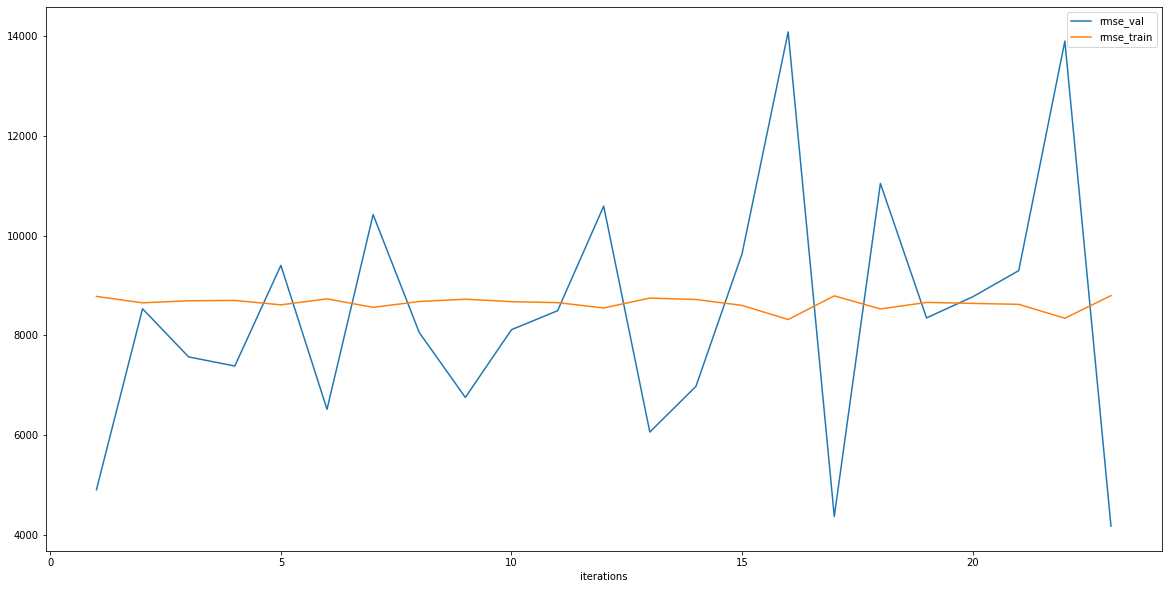

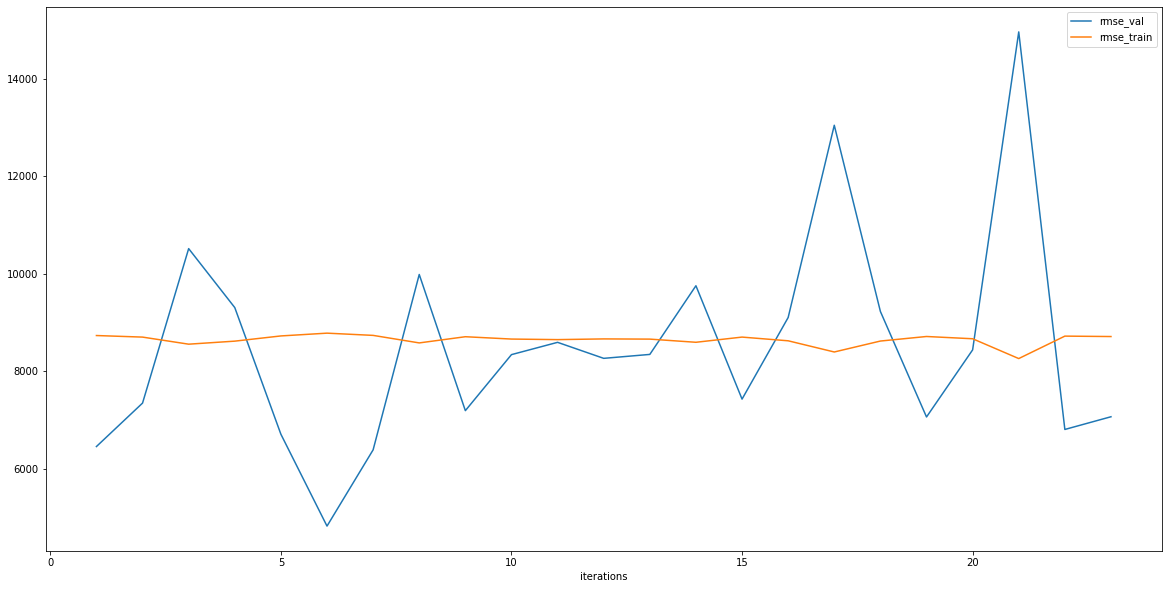

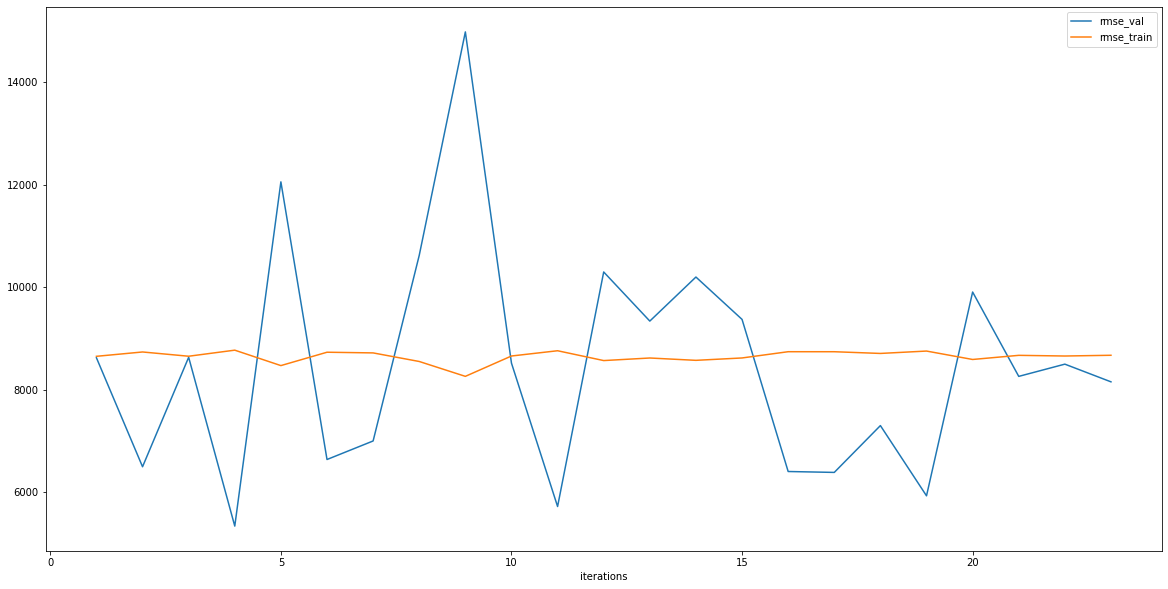

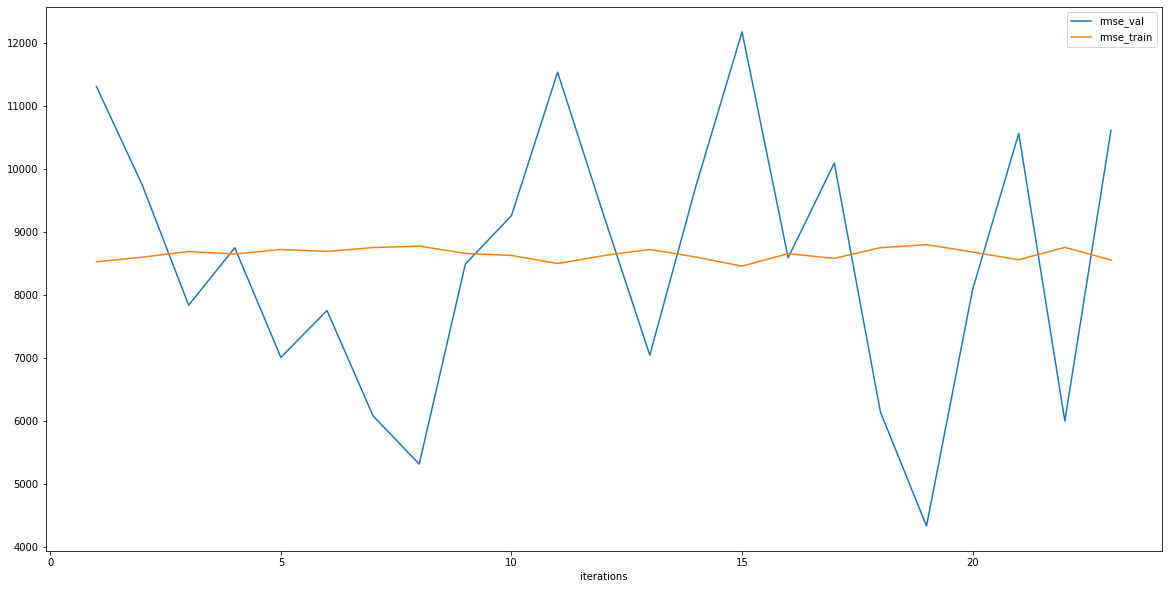

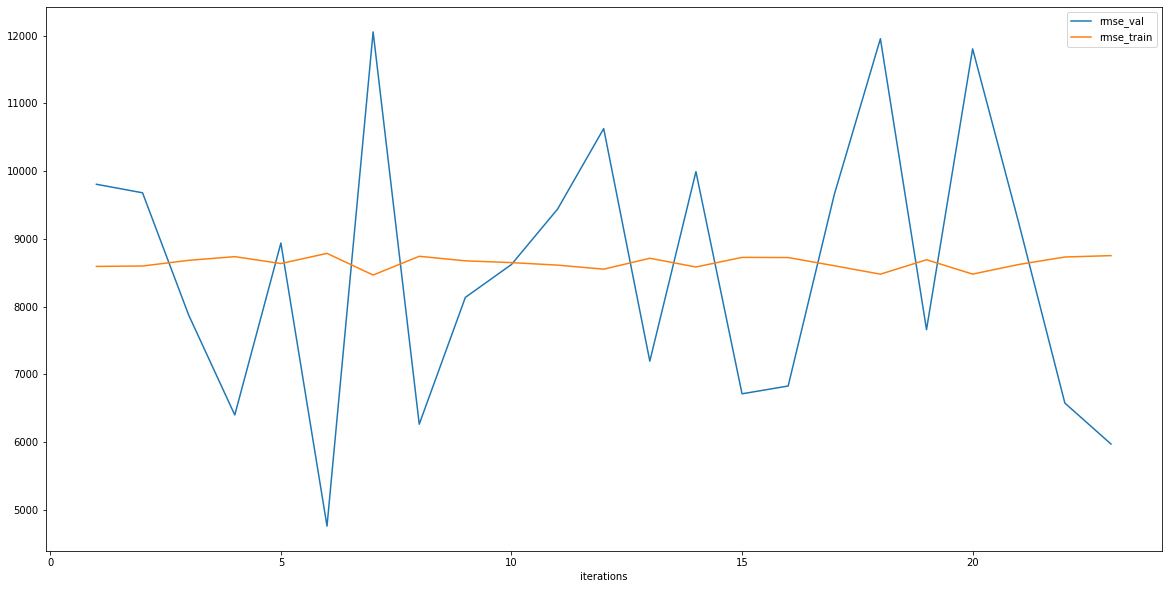

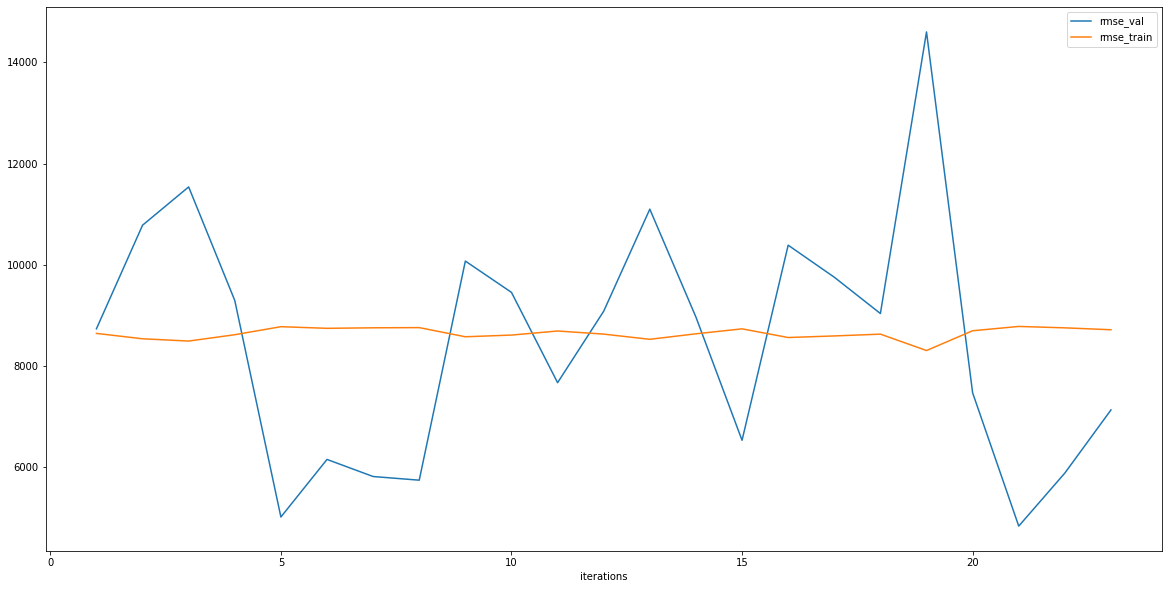

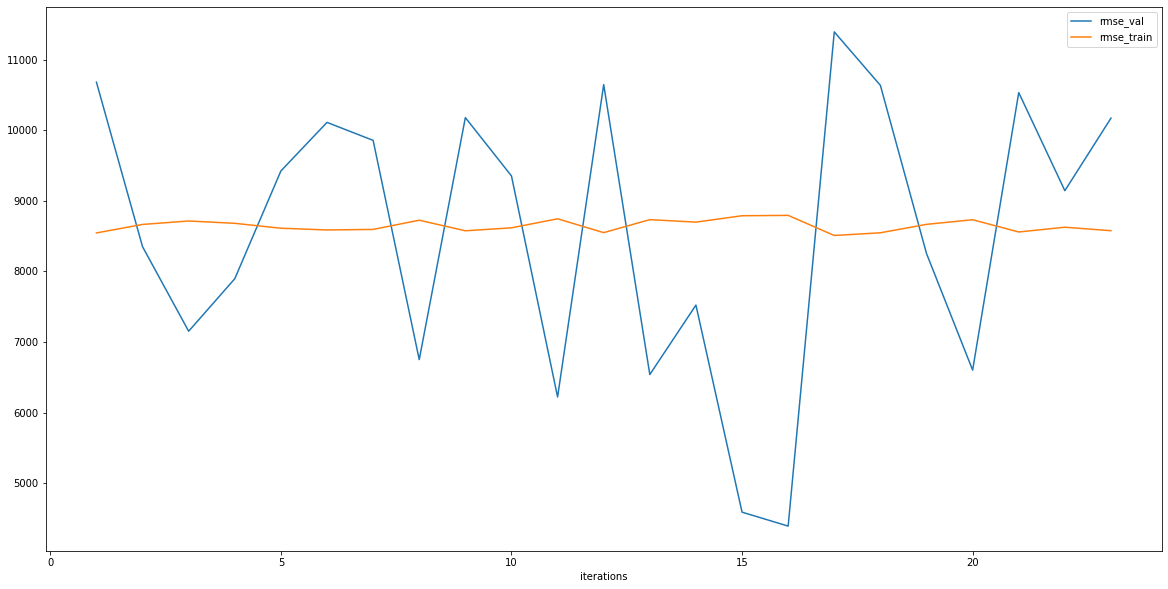

In [40]:
def plot(n):
    e1 = errors[errors["epoca"] == n]
    e1 = e1.set_index("iterations", drop=True)
    e1.drop("epoca", axis=1, inplace=True)
    
    e1.plot(figsize=(20,10))

for i in range(1, 8):
    plot(i)

In [41]:
errors1 = errors.set_index(["epoca", "iterations"])

<AxesSubplot:xlabel='epoca,iterations'>

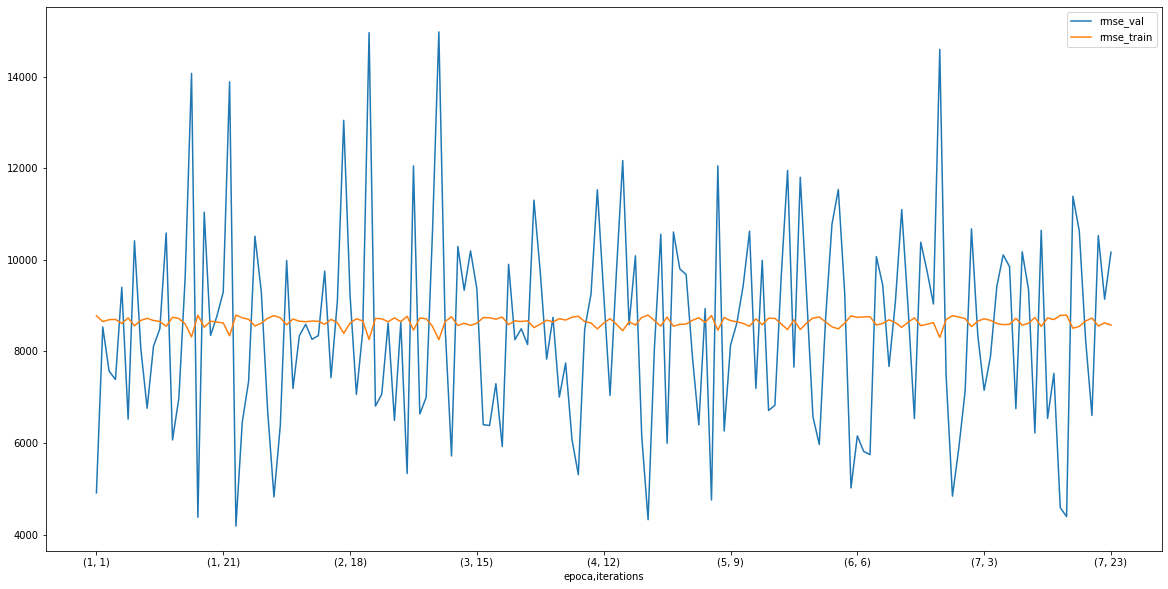

In [42]:
errors1.plot(figsize=(20,10))

### SVR

In [43]:
from sklearn.svm import SVR

In [44]:
svr_rbf = SVR()

In [45]:
val_score = []
train_score = []
mae_traine = []
rmse_traine = []

for i, (train, val) in enumerate(k_fold.split(X_train)):

    svr_rbf.fit(X_train[train], y_train[train])
    score_val = round(svr_rbf.score(X_train[val], y_train[val]), 3)
    val_score.append(score_val)
    score_train = svr_rbf.score(X_train[train], y_train[train])
    train_score.append(score_train)
    mae_train = mean_absolute_error(y_train[train], svr_rbf.predict(X_train[train]))
    mae_traine.append(mae_train)
    rmse_train = np.sqrt(mean_squared_error(y_train[train], svr_rbf.predict(X_train[train])))
    rmse_traine.append(rmse_train)

print("val_score: ", val_score)
print("-----------------------------------------------------")
print("train_score: ", train_score)
print("-----------------------------------------------------")
print("mae_traine: ", mae_traine)
print("-----------------------------------------------------")
print("rmse_traine: ", rmse_traine)

mae_val = cross_val_score(svr_rbf, X_train, y_train, cv=k_fold, scoring="neg_mean_absolute_error", n_jobs=-1)
mae_val = abs(mae_val)
rmse_val = cross_val_score(svr_rbf, X_train, y_train, cv=k_fold, scoring='neg_root_mean_squared_error', n_jobs=-1)
rmse_val = abs(rmse_val)

print("-----------------------------------------------------")
print("mae_val: ", mae_val)
print("-----------------------------------------------------")
print("rmse_val: ", rmse_val)

val_score:  [-0.156, -0.073, -0.055, -0.614, -0.094, -0.126, -0.133, -0.29, -0.224, -0.594, -0.116, -0.326, -0.131, -0.557, -0.11, -0.701, -0.092, -0.189, -0.195, -0.116, -0.587, -0.534, -0.081, -0.23, -0.121, -0.309, -0.127, -0.216, -0.033, -0.087, -0.395, -0.369, -0.228, -0.123, -0.049, -0.239, -0.428, -0.144, -0.055, -0.493, -0.091, -0.286, -0.189, -1.097, -0.048, -0.322, -0.068, -0.211, -0.326, -0.211, -0.334, -0.098, -0.073, -0.467, -0.618, -0.054, -0.435, -0.088, -0.235, -0.246, -0.212, -0.032, -0.217, -0.279, -0.018, -0.322, -0.286, -0.264, -0.322, -0.19, -0.223, -0.277, -0.265, -0.268, -0.183, -0.052, -0.044, -0.418, -0.525, -0.39, -0.085, -0.131, -0.241, -0.808, -0.108, -0.292, -0.215, -0.038, -0.142, -0.296, -0.214, -0.121, -0.382, -0.234, -0.175, -0.117, -0.33, -0.101, -0.26, -0.106, -0.134, -0.073, -0.387, -0.468, -0.33, -0.655, -0.092, -0.408, -0.34, -0.25, -0.115, -0.428, -0.117, -0.045, -0.095, -0.044, -0.435, -0.161, -0.241, -0.234, -0.085, -0.085, -0.139, -0.336, -0.10

In [46]:
errors = pd.DataFrame({"epoca": epoca, "iterations":iterations,  "rmse_val": rmse_val, "rmse_train": rmse_traine})
errors

,epoca,iterations,rmse_val,rmse_train
0,1,1,10946.646069,15487.771274
1,1,2,13701.829107,15216.154512
2,1,3,14881.745677,15132.724176
3,1,4,17219.713846,15405.517111
4,1,5,15453.528353,15171.889195
...,...,...,...,...
156,7,19,15864.495454,15293.061072
157,7,20,4339.926063,15480.910437
158,7,21,21585.240000,15147.759776
159,7,22,19281.016120,15288.387652


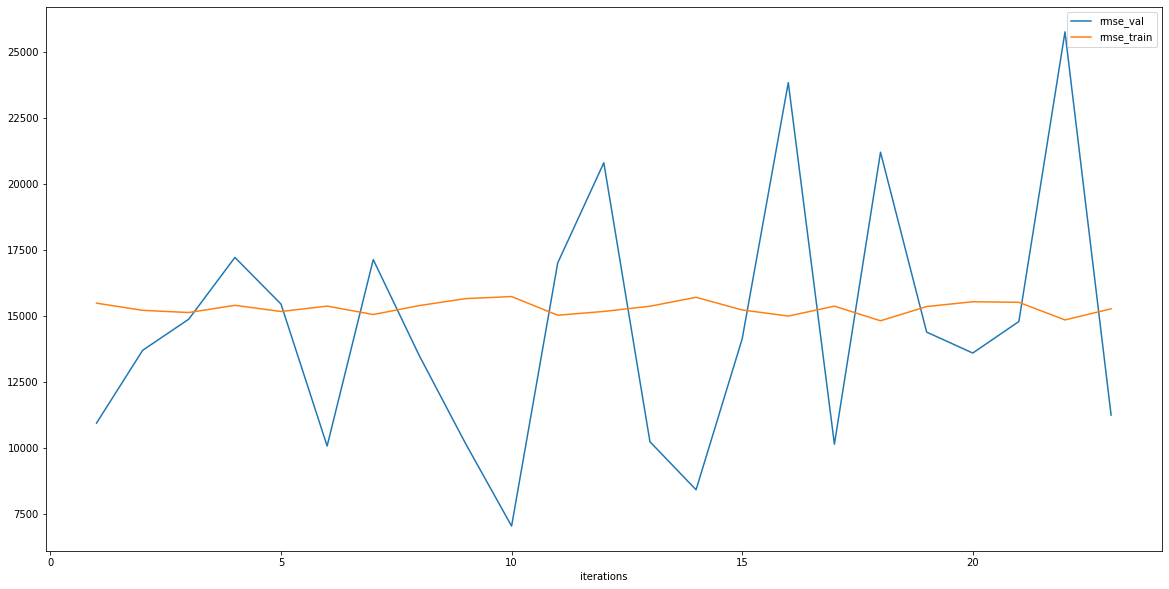

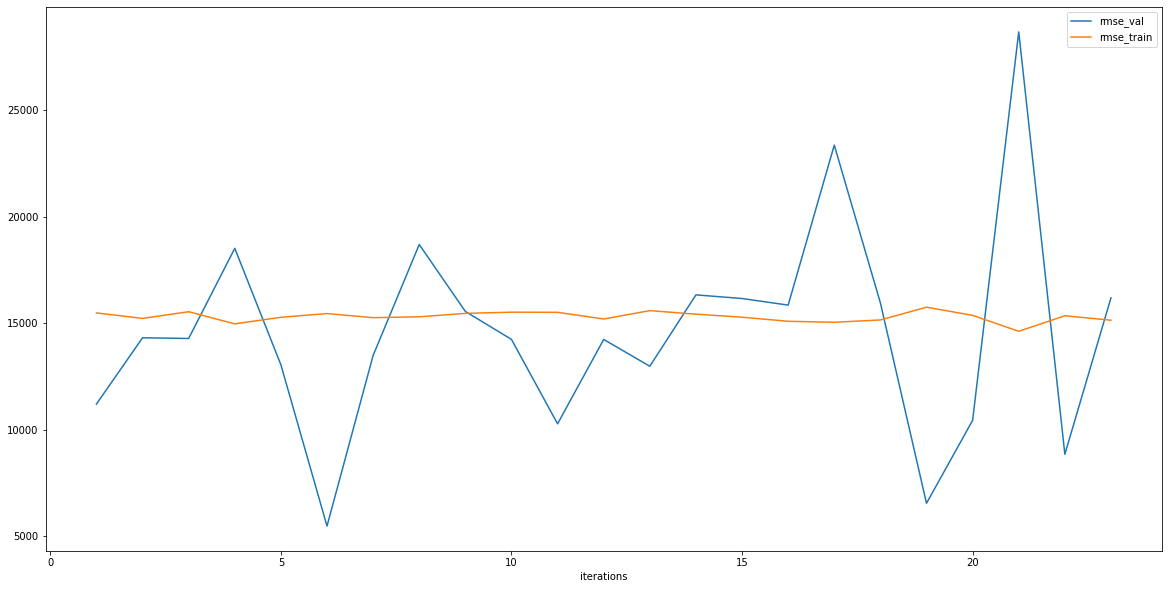

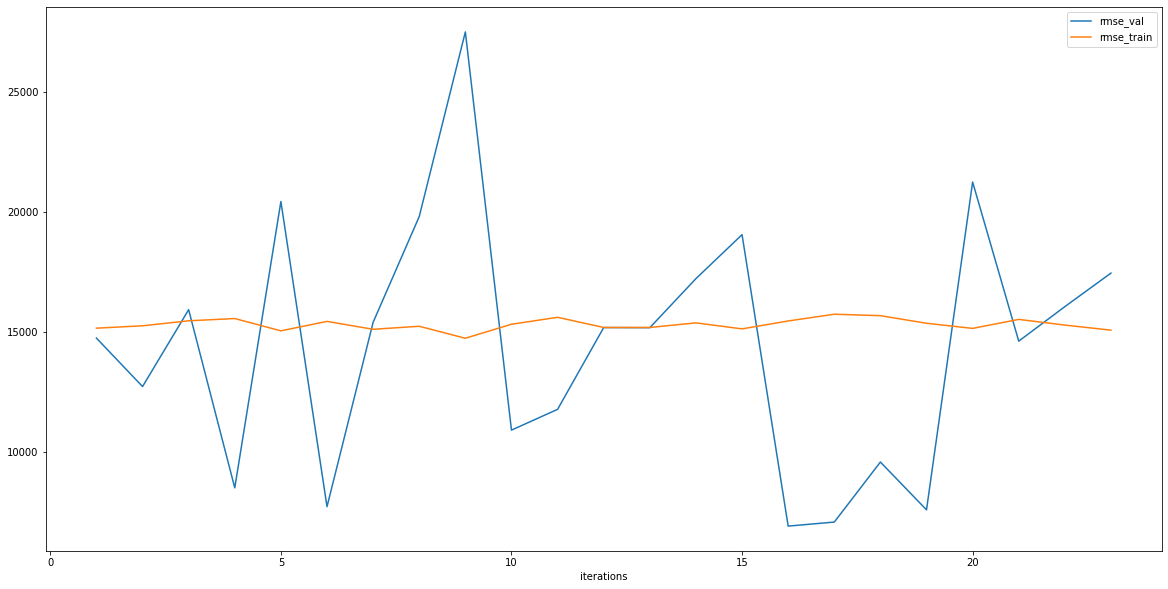

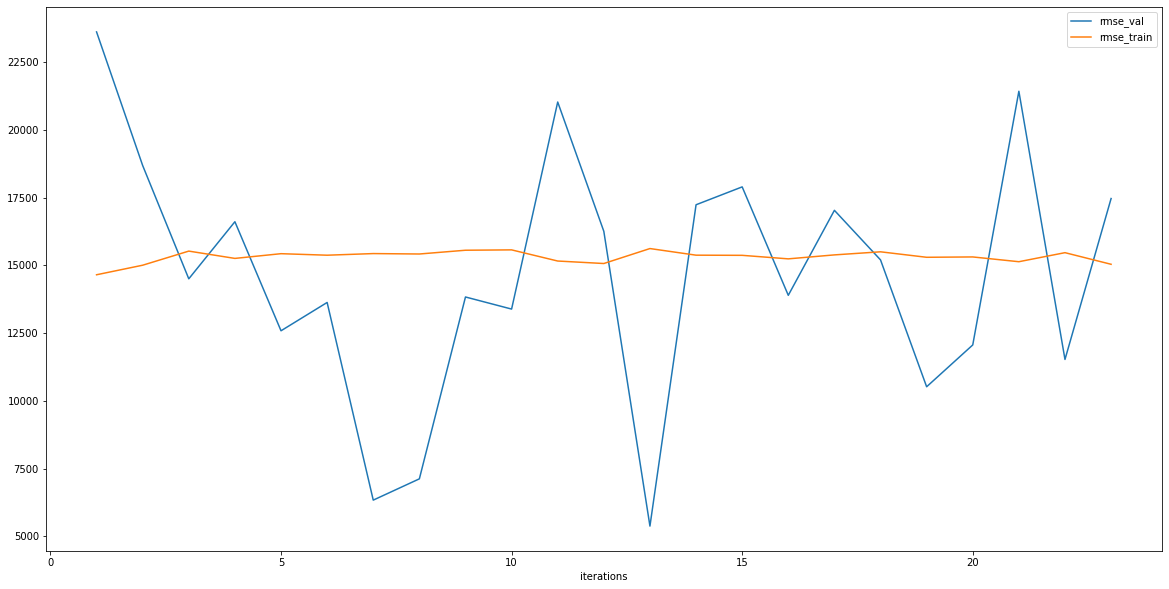

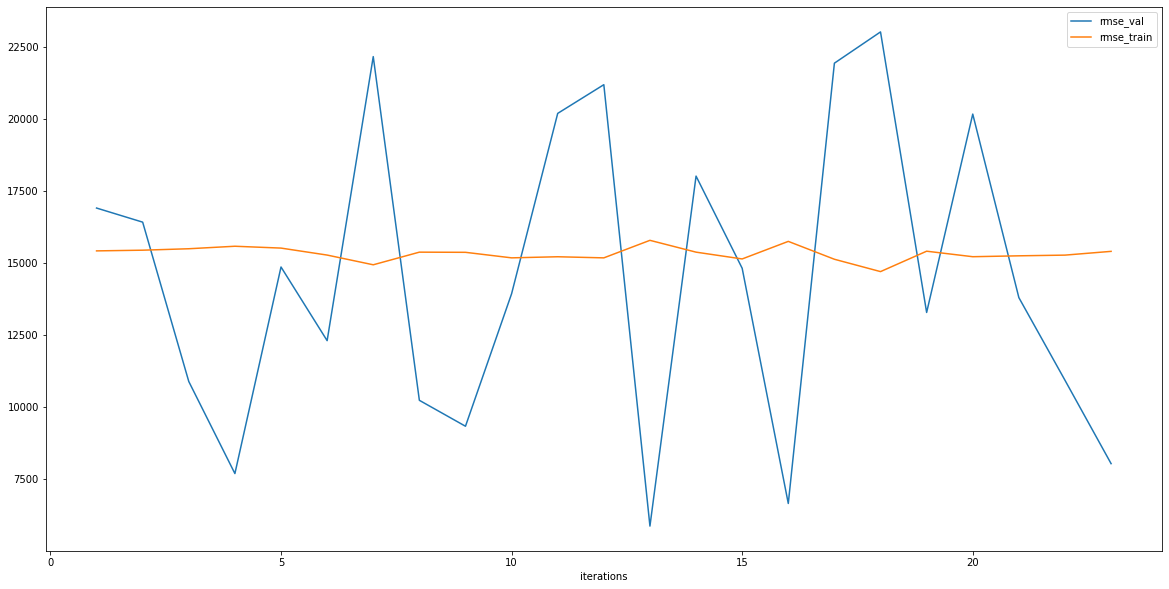

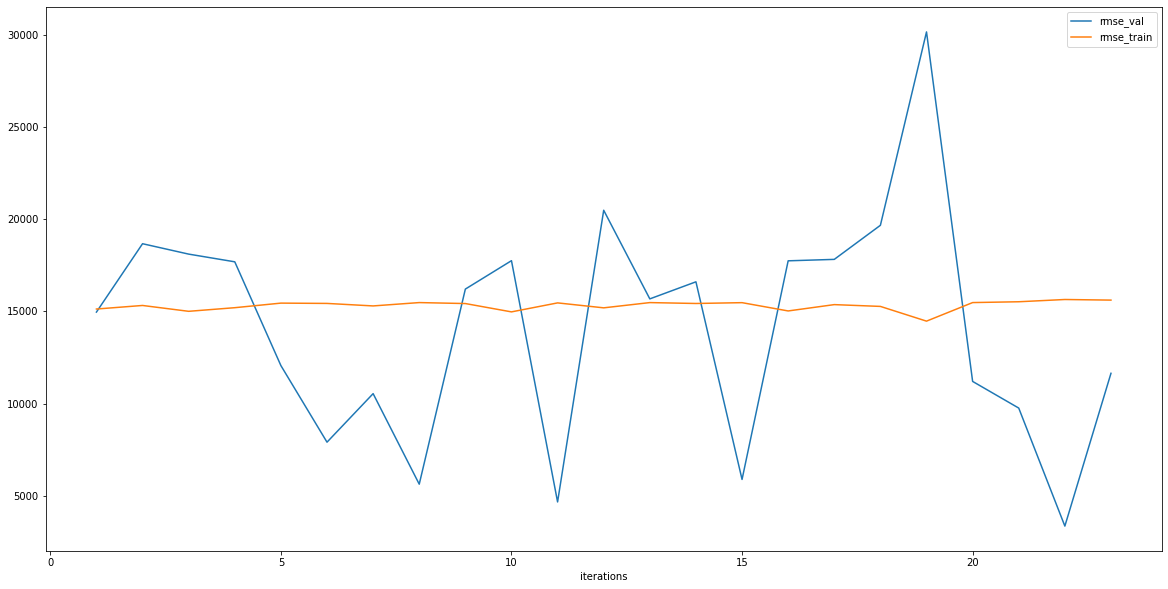

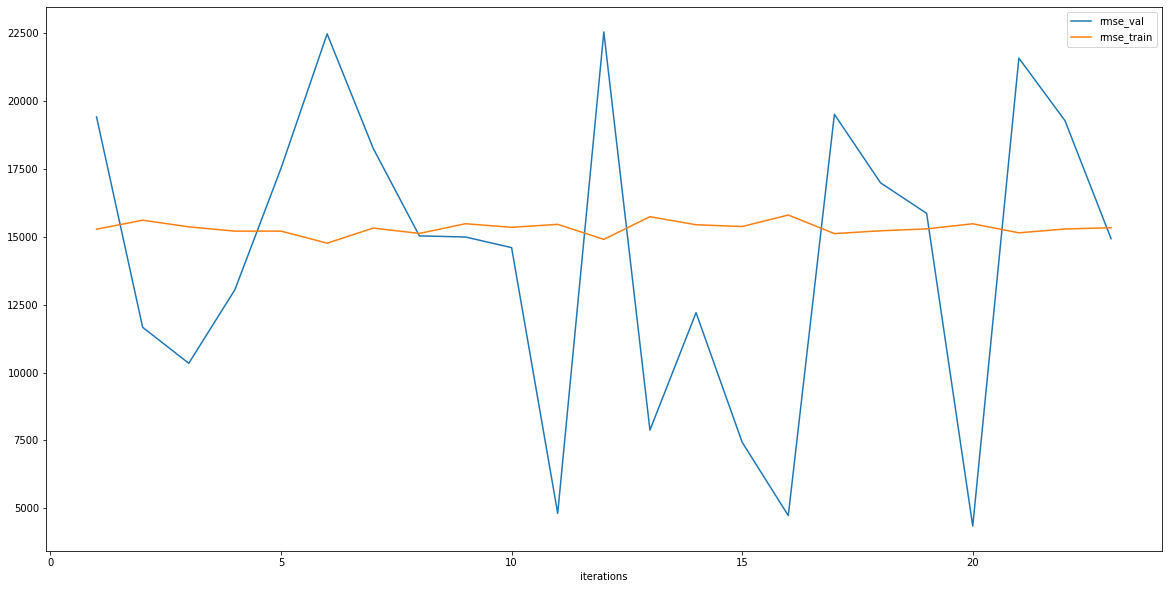

In [47]:
def plot(n):
    e1 = errors[errors["epoca"] == n]
    e1 = e1.set_index("iterations", drop=True)
    e1.drop("epoca", axis=1, inplace=True)
    
    e1.plot(figsize=(20,10))

for i in range(1, 8):
    plot(i)

In [48]:
errors1 = errors.set_index(["epoca", "iterations"])

<AxesSubplot:xlabel='epoca,iterations'>

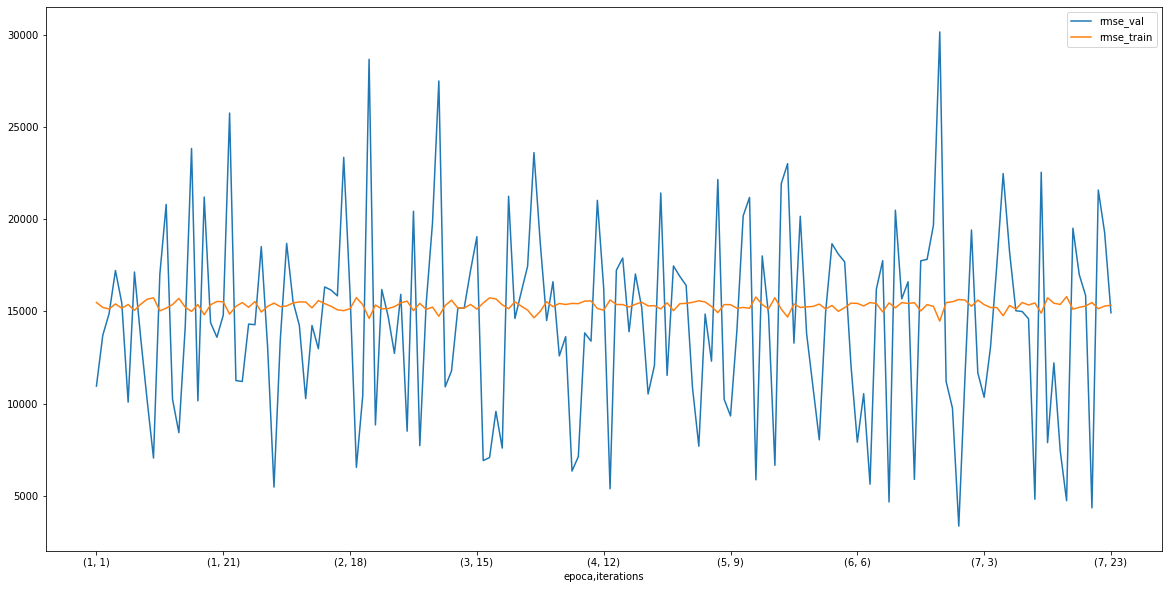

In [49]:
errors1.plot(figsize=(20,10))

### RANDOM FOREST

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
rand_forest = RandomForestRegressor()

In [52]:
val_score = []
train_score = []
mae_traine = []
rmse_traine = []

for i, (train, val) in enumerate(k_fold.split(X_train)):

    rand_forest.fit(X_train[train], y_train[train])
    score_val = round(rand_forest.score(X_train[val], y_train[val]), 3)
    val_score.append(score_val)
    score_train = rand_forest.score(X_train[train], y_train[train])
    train_score.append(score_train)
    mae_train = mean_absolute_error(y_train[train], rand_forest.predict(X_train[train]))
    mae_traine.append(mae_train)
    rmse_train = np.sqrt(mean_squared_error(y_train[train], rand_forest.predict(X_train[train])))
    rmse_traine.append(rmse_train)

print("val_score: ", val_score)
print("-----------------------------------------------------")
print("train_score: ", train_score)
print("-----------------------------------------------------")
print("mae_traine: ", mae_traine)
print("-----------------------------------------------------")
print("rmse_traine: ", rmse_traine)

mae_val = cross_val_score(rand_forest, X_train, y_train, cv=k_fold, scoring="neg_mean_absolute_error", n_jobs=-1)
mae_val = abs(mae_val)
rmse_val = cross_val_score(rand_forest, X_train, y_train, cv=k_fold, scoring='neg_root_mean_squared_error', n_jobs=-1)
rmse_val = abs(rmse_val)

print("-----------------------------------------------------")
print("mae_val: ", mae_val)
print("-----------------------------------------------------")
print("rmse_val: ", rmse_val)

val_score:  [0.965, 0.984, 0.991, 0.967, 0.996, 0.997, 0.992, 0.986, 0.99, 0.97, 0.989, 0.989, 0.998, 0.83, 0.934, 0.963, 0.952, 0.989, 0.988, 0.995, 0.832, 0.986, 0.989, 0.977, 0.991, 0.611, 0.986, 0.978, 0.99, 0.985, 0.991, 0.989, 0.998, 0.988, 0.995, 0.999, 0.992, 0.987, 0.991, 0.976, 0.992, 0.982, 0.989, 0.93, 0.98, 0.974, 0.986, 0.973, 0.99, 0.99, 0.911, 0.994, 0.987, 0.975, 0.995, 0.842, 0.983, 0.989, 0.992, 0.989, 0.995, 0.993, 0.92, 0.962, 0.996, 0.973, 0.99, 0.975, 0.976, 0.992, 0.992, 0.99, 0.985, 0.752, 0.984, 0.951, 0.981, 0.99, 0.979, 0.981, 0.999, 0.883, 0.997, 0.946, 0.993, 0.99, 0.995, 0.974, 0.855, 0.992, 0.948, 0.985, 0.994, 0.997, 0.996, 0.969, 0.989, 0.978, 0.958, 0.994, 0.979, 0.998, 0.967, 0.969, 0.917, 0.982, 0.996, 0.967, 0.986, 0.989, 0.997, 0.98, 0.995, 0.738, 0.987, 1.0, 0.978, 0.992, 0.997, 0.969, 0.935, 0.996, 0.976, 0.989, 0.996, 0.987, 0.985, 0.898, 0.975, 0.99, 0.979, 0.989, 0.882, 0.979, 0.983, 0.978, 0.912, 0.988, 0.983, 0.927, 0.978, 0.982, 0.993, 0.9

In [53]:
errors = pd.DataFrame({"epoca": epoca, "iterations":iterations,  "rmse_val": rmse_val, "rmse_train": rmse_traine})
errors

,epoca,iterations,rmse_val,rmse_train
0,1,1,1742.199909,830.064666
1,1,2,1513.390012,765.592664
2,1,3,1329.144594,706.826902
3,1,4,2388.598661,819.827360
4,1,5,809.634616,772.730432
...,...,...,...,...
156,7,19,1117.569717,874.974645
157,7,20,889.748094,720.812163
158,7,21,5389.958917,783.928225
159,7,22,1497.985643,799.803354


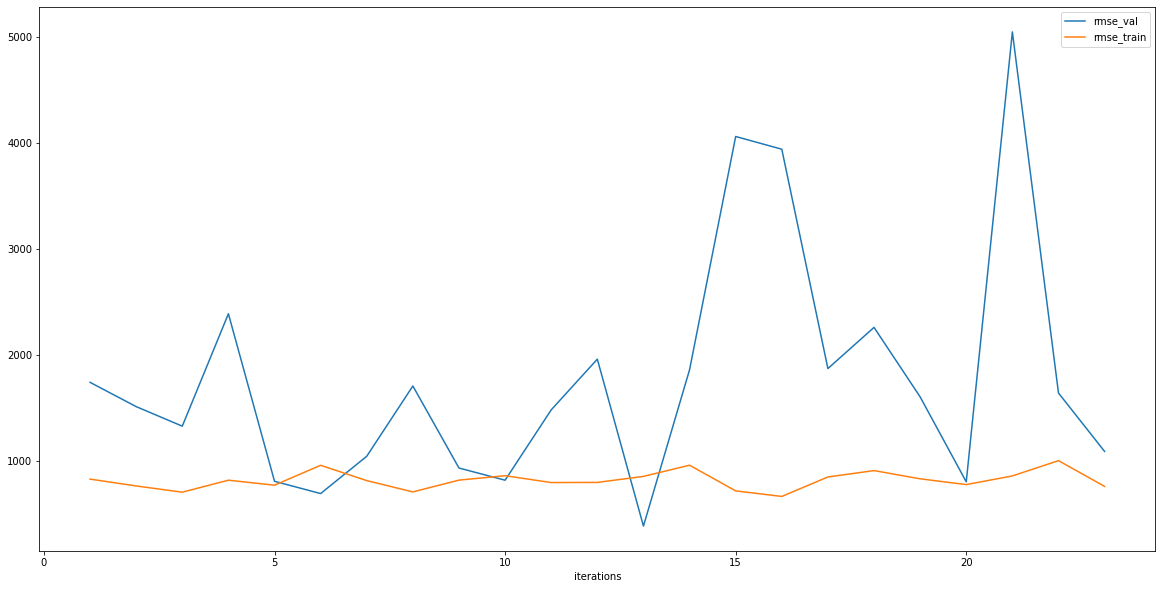

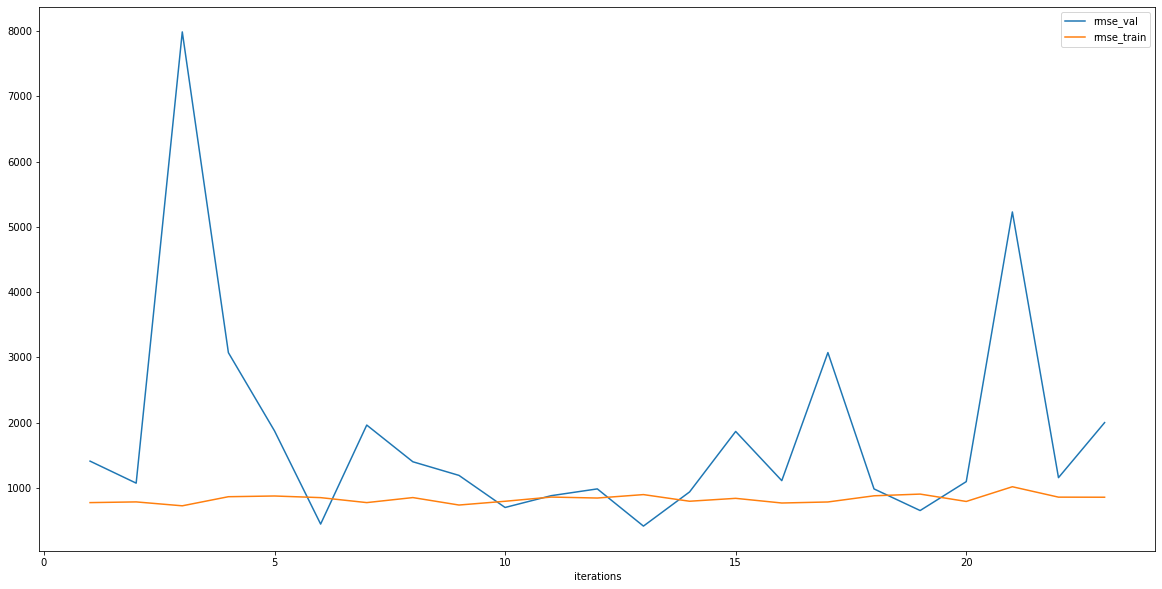

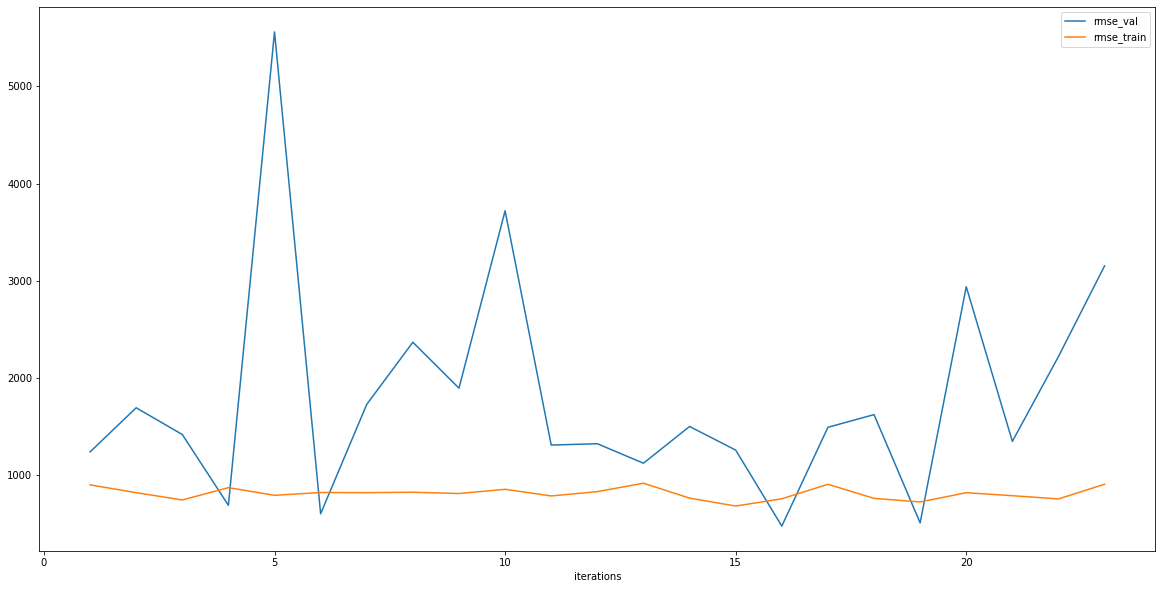

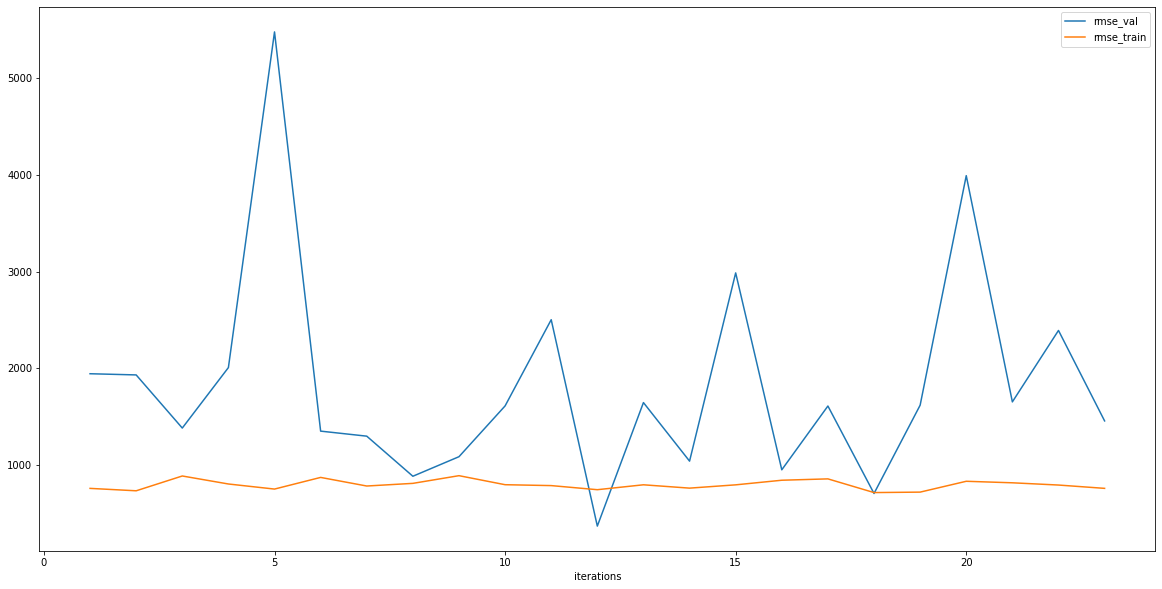

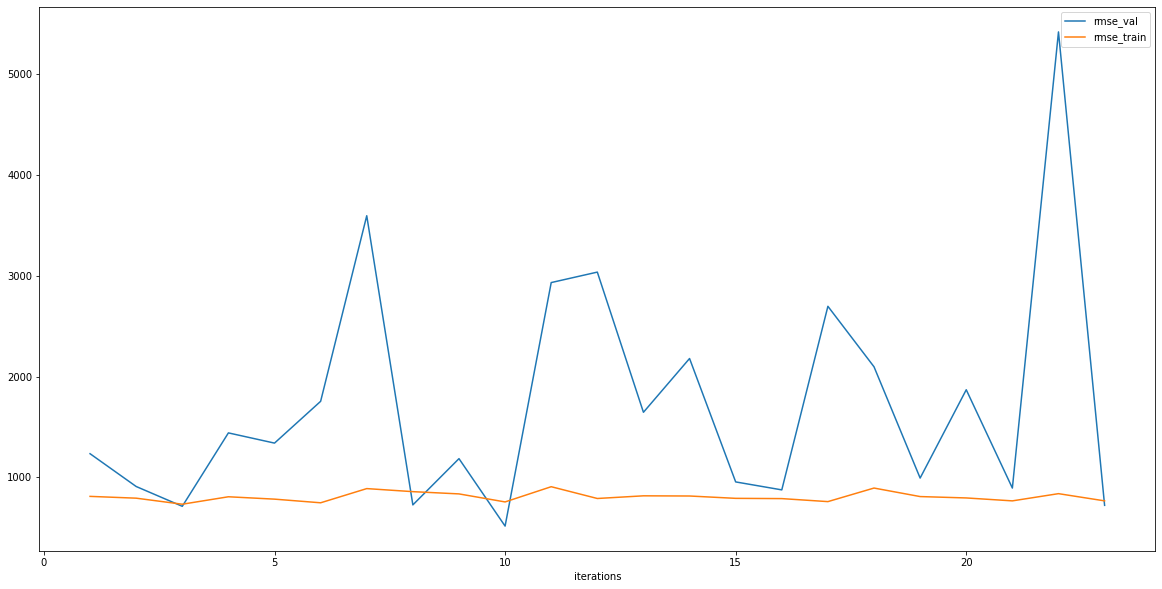

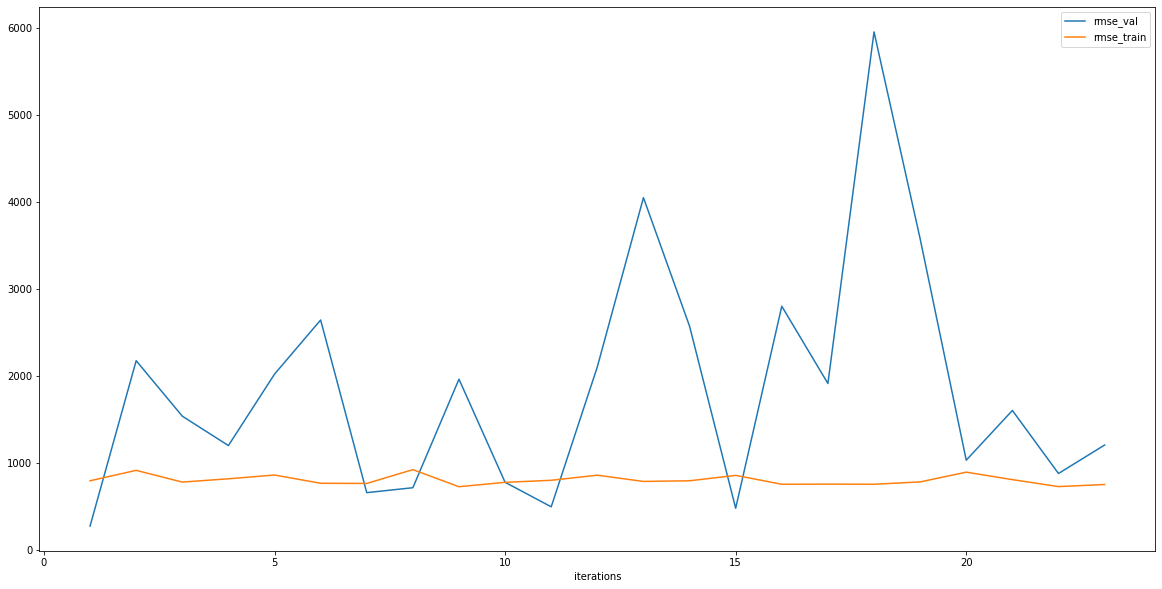

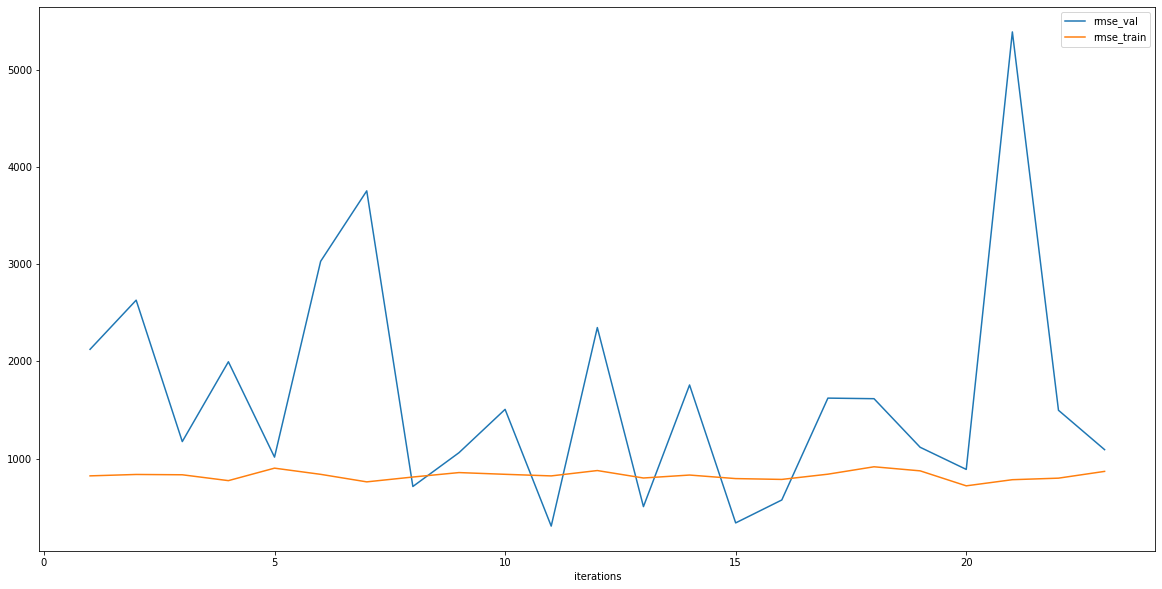

In [59]:
def plot(n):
    e1 = errors[errors["epoca"] == n]
    e1 = e1.set_index("iterations", drop=True)
    e1.drop("epoca", axis=1, inplace=True)
    
    e1.plot(figsize=(20,10))

for i in range(1, 8):
    plot(i)

In [54]:
errors1 = errors.set_index(["epoca", "iterations"])

<AxesSubplot:xlabel='epoca,iterations'>

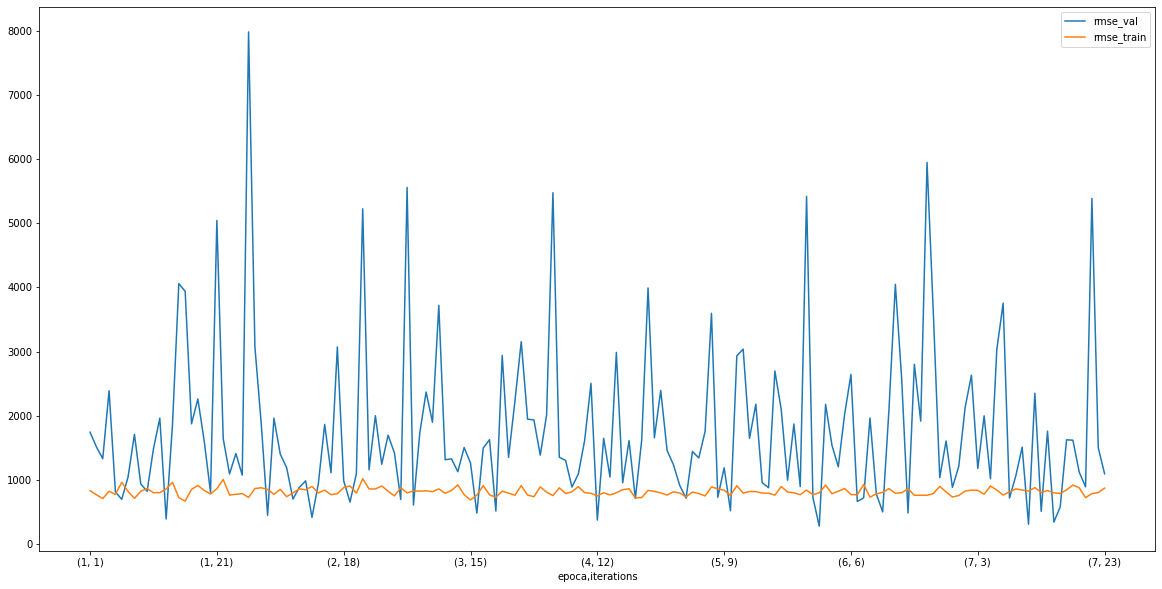

In [55]:
errors1.plot(figsize=(20,10))

<AxesSubplot:>

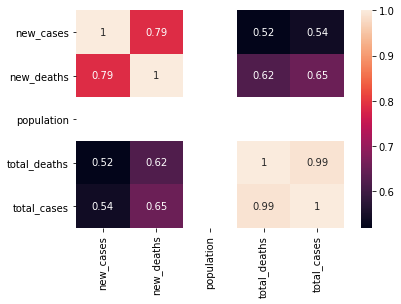

In [58]:
import seaborn as sns
sns.heatmap(df_turkey.corr(), annot=True)

Sí está sobreentrenado, vemos que el error en val es mucho más grande que en train. 